In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
col = ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry', 'Groove', 'Class']

In [18]:
df = pd.read_csv('/content/sample_data/seeds_dataset.txt', names = col, sep = "\s+")

In [19]:
df.head()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


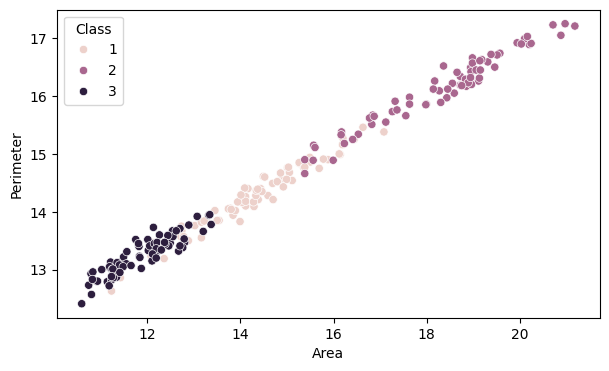

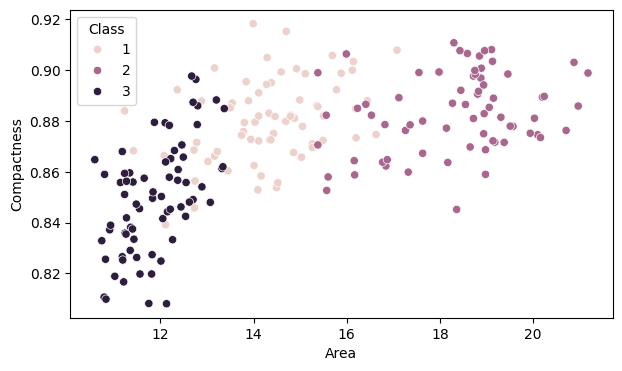

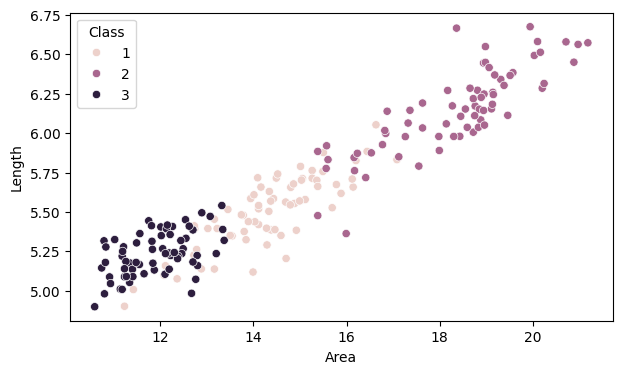

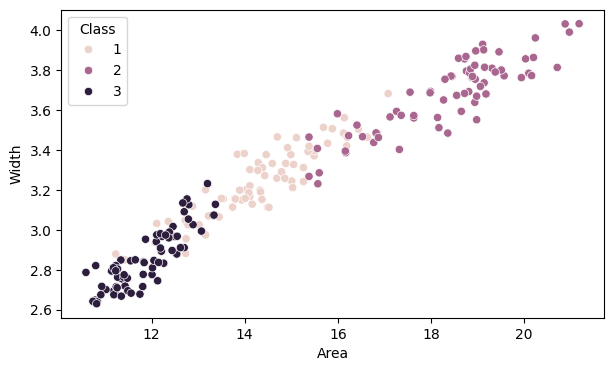

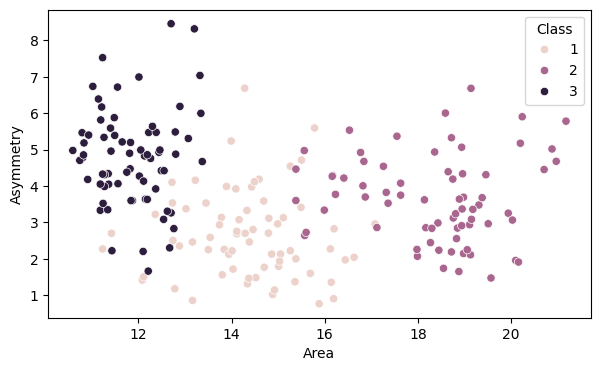

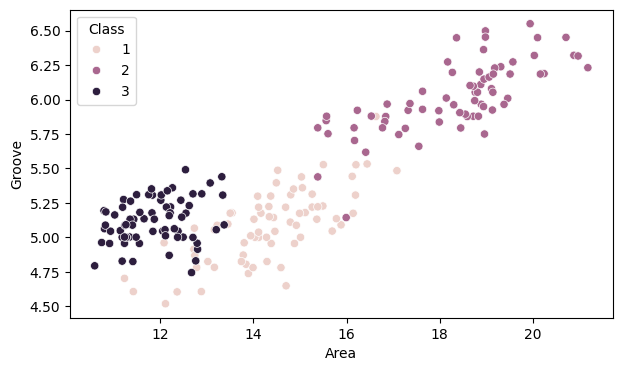

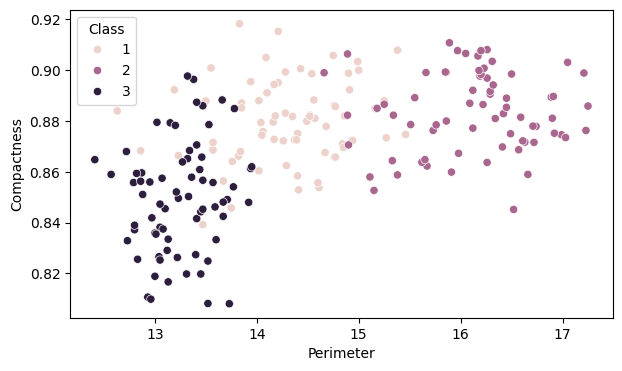

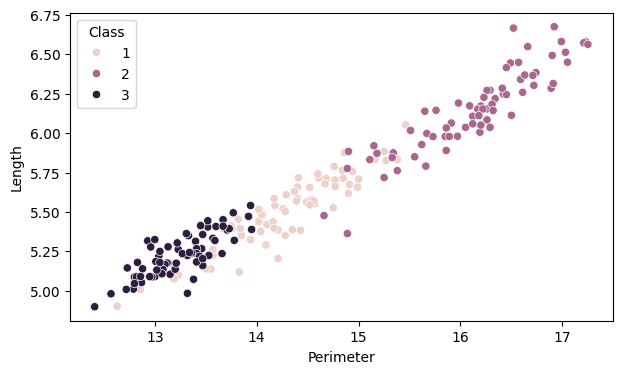

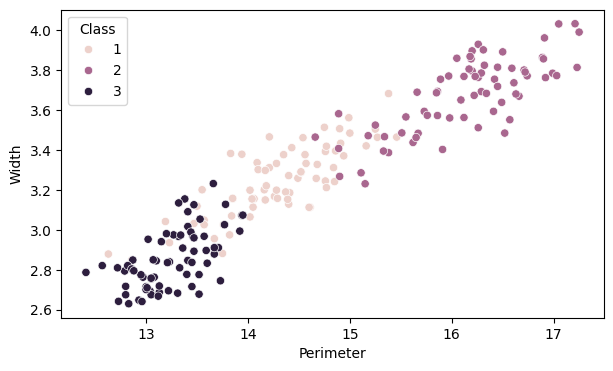

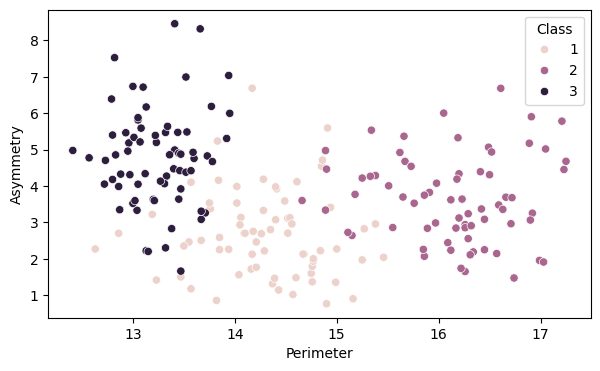

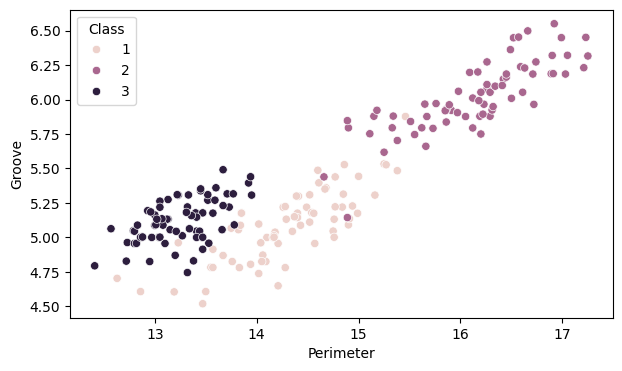

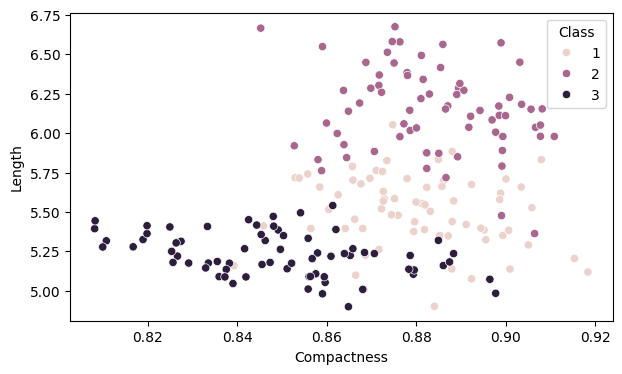

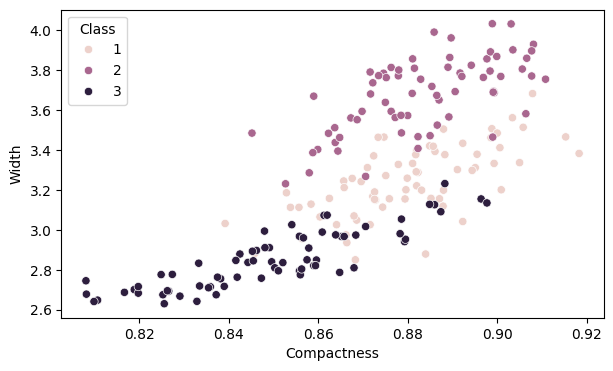

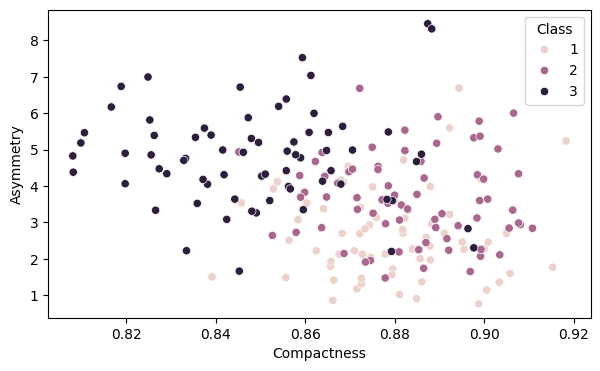

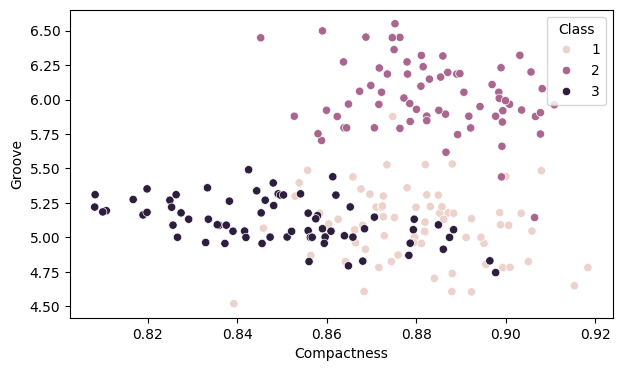

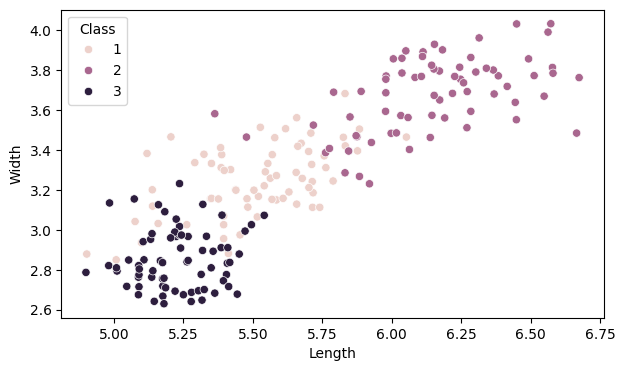

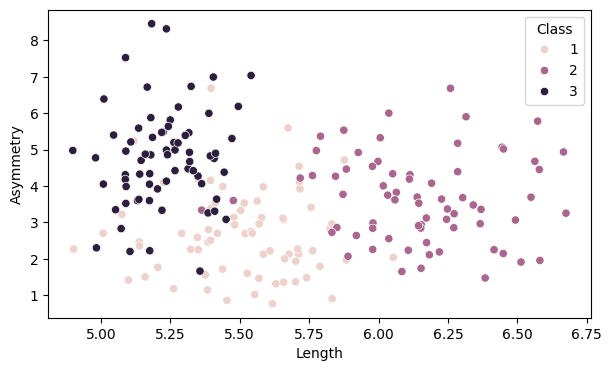

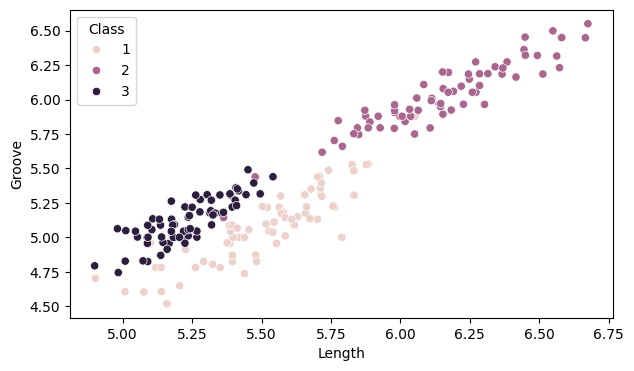

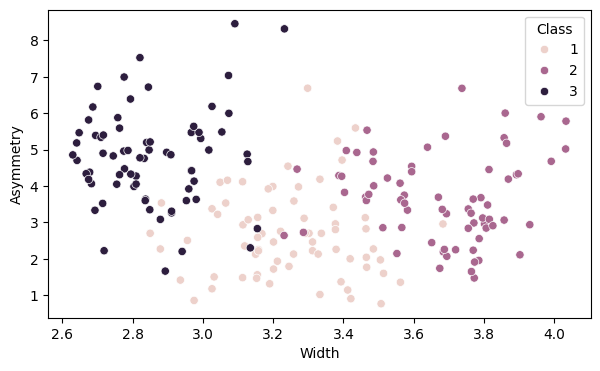

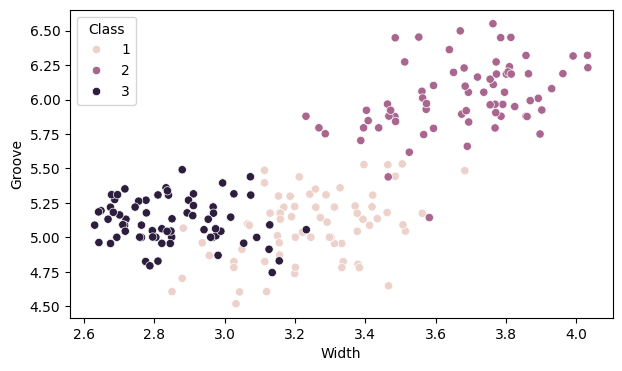

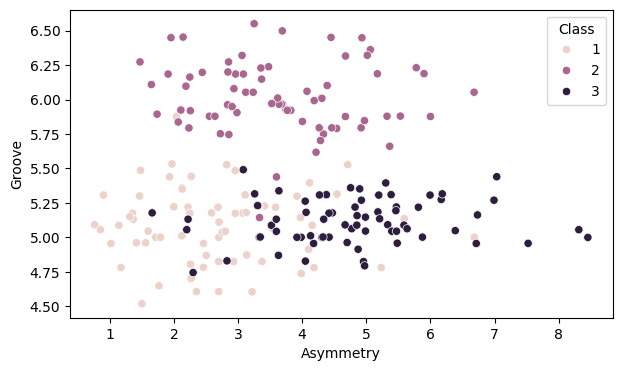

In [23]:
for i in range(len(df.columns[:-1])):
  for j in range(i+1, len(df.columns[:-1])):
    x_label = df.columns[i]
    y_label = df.columns[j]
    plt.figure(figsize = (7, 4))
    sns.scatterplot(x = x_label, y = y_label, data = df, hue = 'Class')
    plt.show()

# Clustering

In [24]:
from sklearn.cluster import KMeans

In [45]:
x = 'Asymmetry'
y = 'Groove'
X = df[[x, y]].values

In [46]:
kmeans = KMeans(n_clusters= 3).fit(X)

In [47]:
clusters = kmeans.labels_

In [48]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns = [x, y , "Class"])

[]

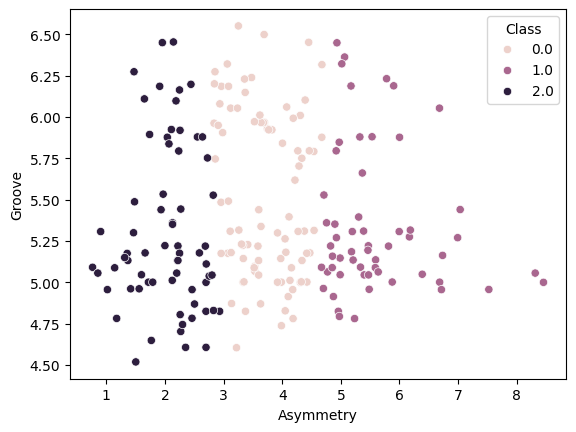

In [49]:
# Clustering
sns.scatterplot(x= x, y = y, hue = "Class", data = cluster_df)
plt.plot()

[]

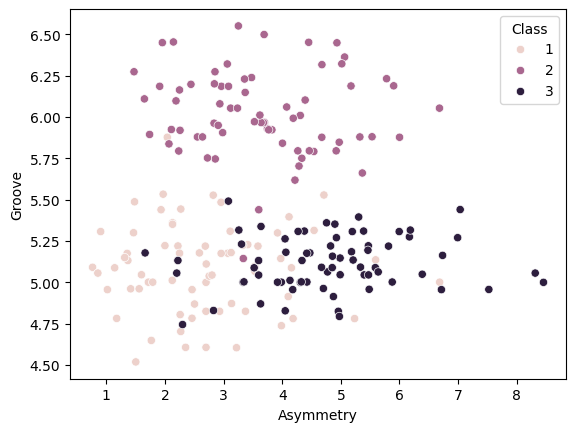

In [50]:
# Original
sns.scatterplot(x= x, y = y, hue = "Class", data = df)
plt.plot()

# Higher Dimensions

In [51]:
X = df[col[:-1]].values

[]

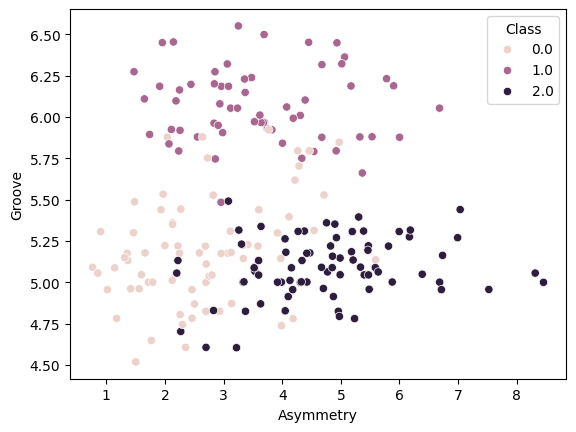

In [52]:
#Clustered
kmeans = KMeans(n_clusters = 3).fit(X)
clusters = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns = df.columns)
sns.scatterplot(x= x, y = y, hue = "Class", data = cluster_df)
plt.plot()

[]

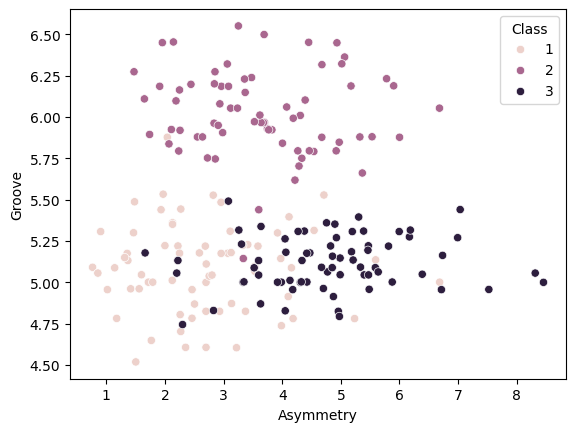

In [53]:
# Original
sns.scatterplot(x= x, y = y, hue = "Class", data = df)
plt.plot()

# PCA

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca = PCA(n_components = 2)
transformed_x = pca.fit_transform(X)

In [56]:
X

(210, 7)

In [59]:
transformed_x[:5]

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

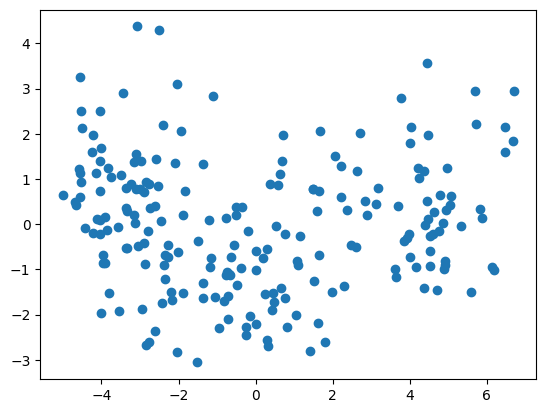

In [60]:
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [61]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns = ["pca1", "pca2", "Class"])

In [62]:
Truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df['Class'].values.reshape(-1, 1))), columns = ["pca1", "pca2", "Class"])

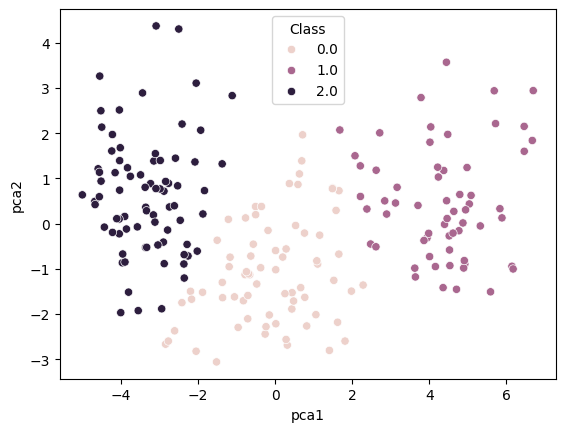

In [63]:
# Kmean Clusters
sns.scatterplot(x = "pca1", y = "pca2", hue = "Class", data = kmeans_pca_df)
plt.show()

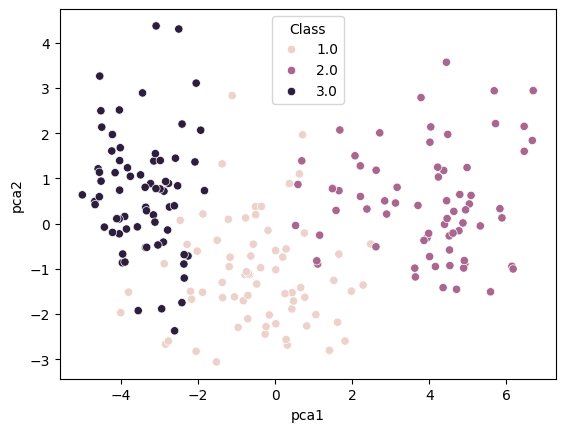

In [64]:
# Kmean Clusters
sns.scatterplot(x = "pca1", y = "pca2", hue = "Class", data = Truth_pca_df)
plt.show()